In [108]:
import cv2 as cv
import numpy as np  
import matplotlib.pyplot as plt

在DPCM系统中，需要注意的是预测器的输入是已经解码以后的样本。之所以不用原始样本来做预测，是因为在解码端无法得到原始样本，只能得到存在误差的样本。因此，在DPCM编码器中实际内嵌了一个解码器。下面是DPCM的原理图：

![](information\DPCM.jpg)

In [109]:
def DPCM(yBuffer, dBuffer, re, w, h, bitnum):
    # yBuffer raw buffer
    # dBuffer x buffer
    # rebuildBuffer reconstruct buffer
    x = 2 ** (8 - bitnum)
    y = 2 ** (9 - bitnum)
    flow_upper_bound = 2 ** bitnum - 1
    for i in range(0, h):
        prediction = 128
        pred_error = yBuffer[i * w] - prediction
        tmp = (pred_error + 128) // x
        dBuffer[i * w] = tmp
        inv_pred_error = dBuffer[i * w] * x - 128
        re[i * w] = inv_pred_error + prediction
        for j in range(1, w):
            prediction = re[i * w + j - 1]
            predErr = yBuffer[i * w + j] - prediction
            tmp = (predErr + 255) // y
            dBuffer[i * w + j] = tmp
            invPredErr = dBuffer[i * w + j] * y - 255
            re[i * w + j] = invPredErr + prediction

In [110]:
Img = cv.imread('lena.jpg')
Img = cv.cvtColor(Img, cv.COLOR_BGR2GRAY)
h = Img.shape[0]
w = Img.shape[1]

In [111]:
"""----------------------------------------1 bit 重构----------------------------------------"""
dBuffer1 = np.zeros((h * w), dtype=np.uint8)
rebuildBuffer1 = np.zeros((h * w), dtype=np.uint8)
yBuffer1 = Img.reshape(h*w)

DPCM(yBuffer1, dBuffer1, rebuildBuffer1, w, h, 1)
dBuffer1 = dBuffer1.reshape(h, w)
rebuildBuffer1 = rebuildBuffer1.reshape(h, w)

"""----------------------------------------2 bit 重构----------------------------------------"""
dBuffer2 = np.zeros((h * w), dtype=np.uint8)
rebuildBuffer2 = np.zeros((h * w), dtype=np.uint8)
yBuffer2 = Img.reshape(h*w)

DPCM(yBuffer2, dBuffer2, rebuildBuffer2, w, h, 2)
dBuffer2 = dBuffer2.reshape(h, w)
rebuildBuffer2 = rebuildBuffer2.reshape(h, w)

"""----------------------------------------4 bit 重构----------------------------------------"""
dBuffer4 = np.zeros((h * w), dtype=np.uint8)
rebuildBuffer4 = np.zeros((h * w), dtype=np.uint8)
yBuffer4 = Img.reshape(h*w)

DPCM(yBuffer4, dBuffer4, rebuildBuffer4, w, h, 4)
dBuffer4 = dBuffer4.reshape(h, w)
rebuildBuffer4 = rebuildBuffer4.reshape(h, w)

"""----------------------------------------8 bit 重构----------------------------------------"""
dBuffer8 = np.zeros((h * w), dtype=np.uint8)
rebuildBuffer8 = np.zeros((h * w), dtype=np.uint8)
yBuffer8 = Img.reshape(h*w)

DPCM(yBuffer8, dBuffer8, rebuildBuffer8, w, h, 8)
dBuffer8 = dBuffer8.reshape(h, w)
rebuildBuffer8 = rebuildBuffer8.reshape(h, w)

c:\Engineer\Anaconda3\envs\py3_6_13\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars


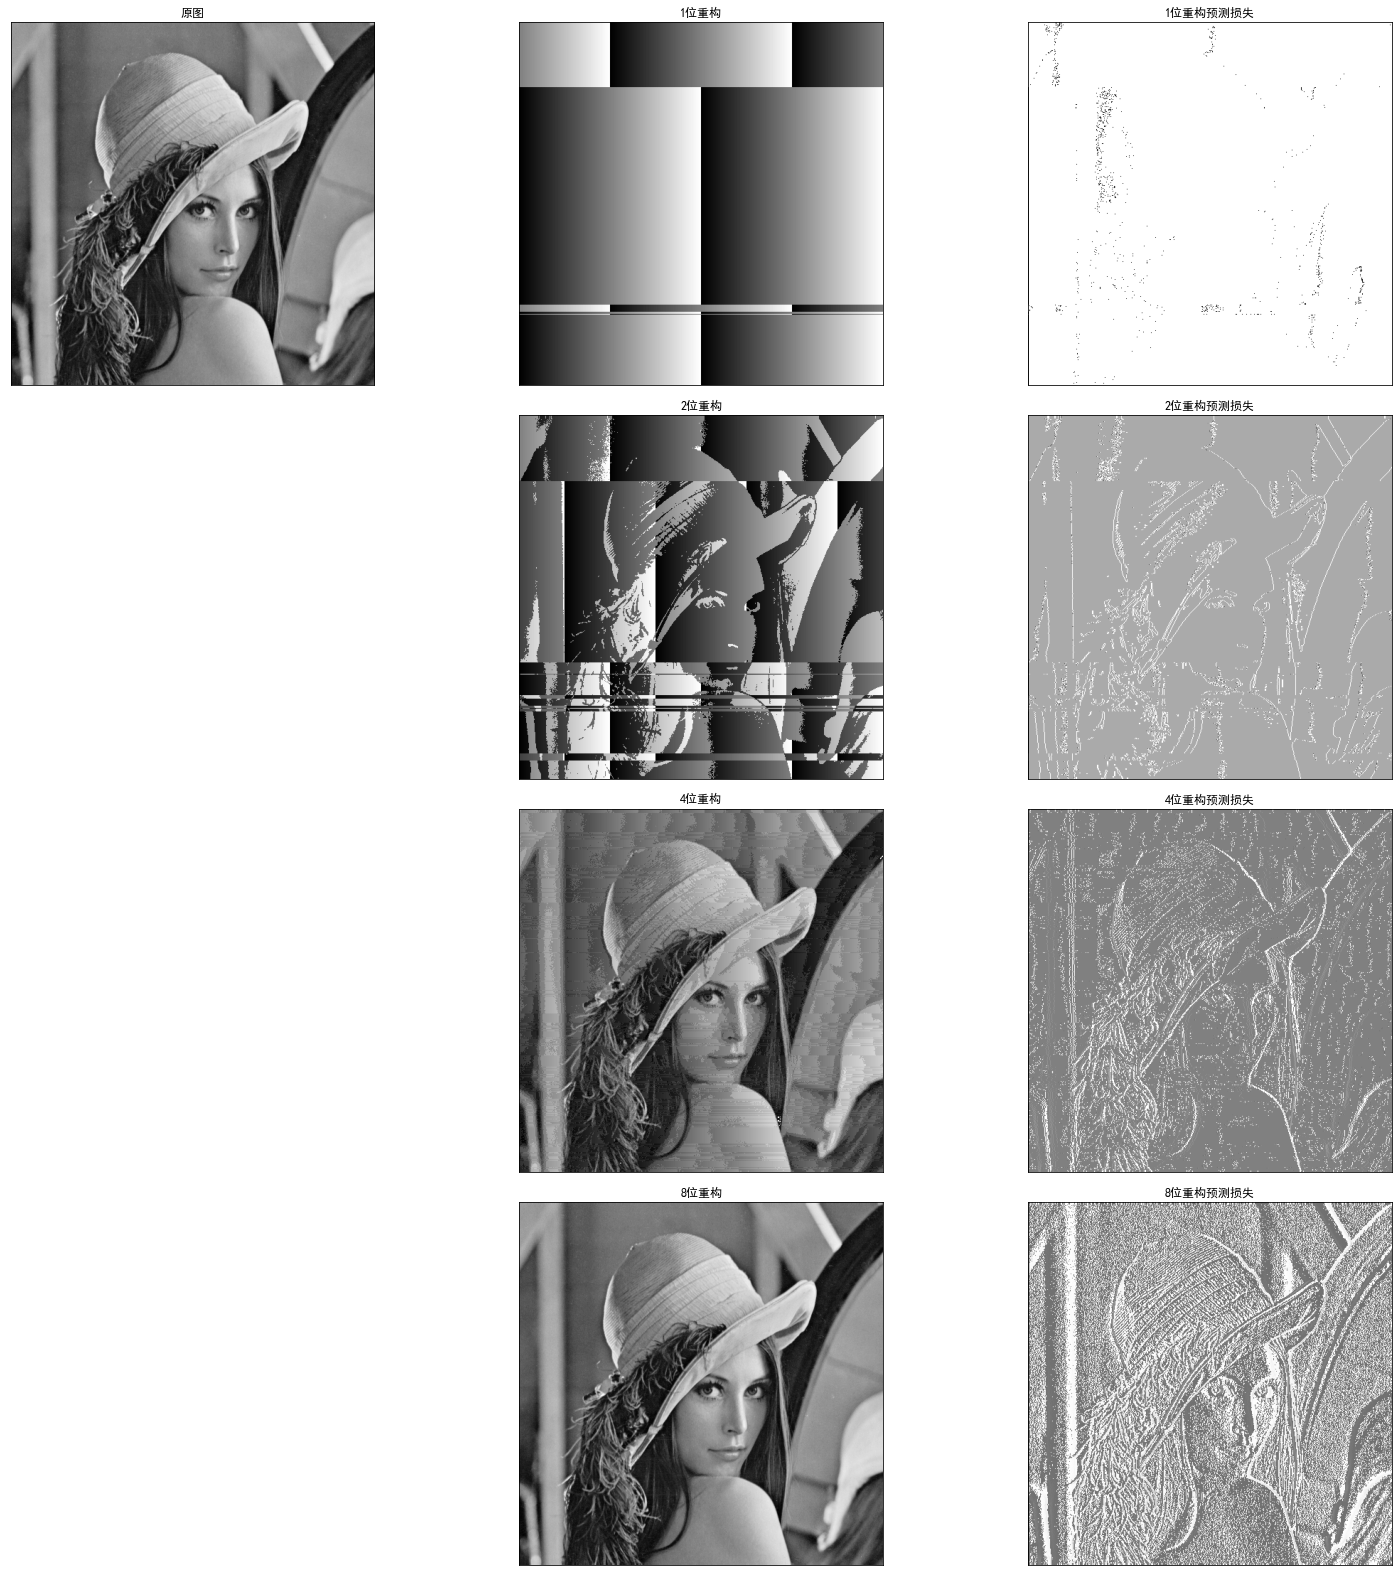

(None, None)

In [112]:
# 显示
plt.figure(figsize=(22, 22))
plt.subplot(4,3,1), plt.imshow(Img, 'gray'), plt.title('原图'), plt.xticks([]), plt.yticks([])
plt.subplot(4,3,2), plt.imshow(rebuildBuffer1, 'gray'), plt.title('1位重构'), plt.xticks([]), plt.yticks([])
plt.subplot(4,3,3), plt.imshow(dBuffer1, 'gray'), plt.title('1位重构预测损失'), plt.xticks([]), plt.yticks([])
plt.subplot(4,3,5), plt.imshow(rebuildBuffer2, 'gray'), plt.title('2位重构'), plt.xticks([]), plt.yticks([])
plt.subplot(4,3,6), plt.imshow(dBuffer2, 'gray'), plt.title('2位重构预测损失'), plt.xticks([]), plt.yticks([])
plt.subplot(4,3,8), plt.imshow(rebuildBuffer4, 'gray'), plt.title('4位重构'), plt.xticks([]), plt.yticks([])
plt.subplot(4,3,9), plt.imshow(dBuffer4, 'gray'), plt.title('4位重构预测损失'), plt.xticks([]), plt.yticks([])
plt.subplot(4,3,11), plt.imshow(rebuildBuffer8, 'gray'), plt.title('8位重构'), plt.xticks([]), plt.yticks([])
plt.subplot(4,3,12), plt.imshow(dBuffer8, 'gray'), plt.title('8位重构预测损失'), plt.xticks([]), plt.yticks([])
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.tight_layout(), plt.show()